In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.tsa.arima.model import ARIMA


In [90]:
sunspots_data = sm.datasets.sunspots.load_pandas()
df = sunspots_data.data
df 

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
...,...,...
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5


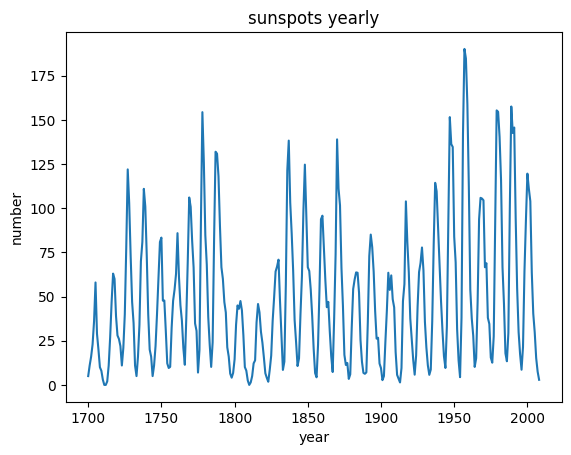

In [91]:
plt.figure()
plt.plot(df['YEAR'], df['SUNACTIVITY'])
plt.title("sunspots yearly")
plt.xlabel("year")
plt.ylabel("number")
plt.show()

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


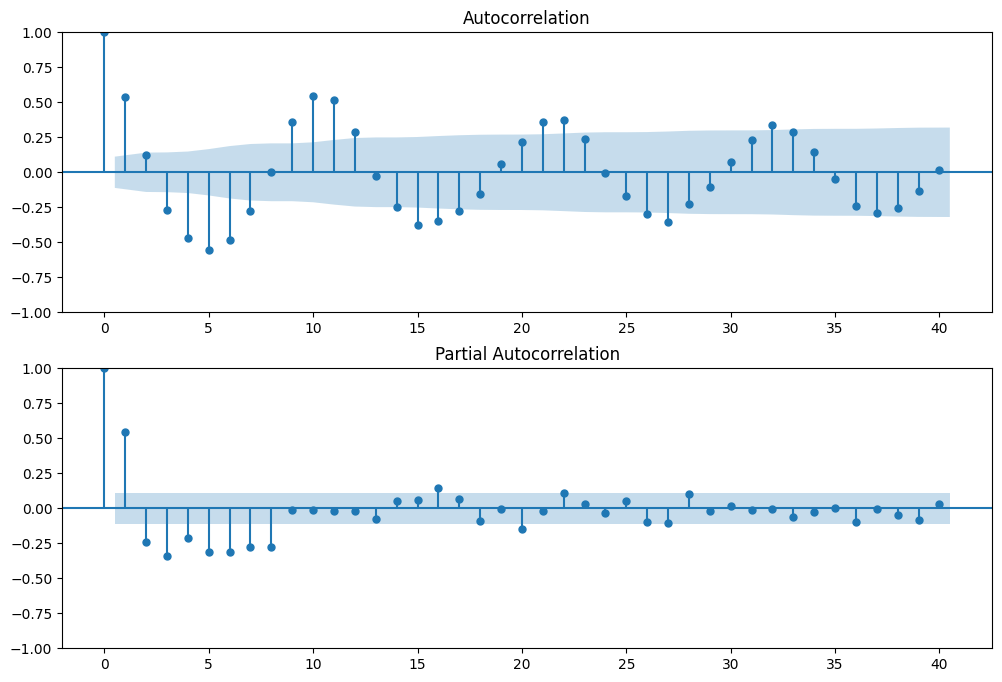

In [92]:
fig, ax = plt.subplots(2, 1, figsize=(12,8))
plot_acf(df_diff, lags=40, ax=ax[0])
plot_pacf(df_diff, lags=40, ax=ax[1])
plt.show()

In [93]:
model = ARIMA(df['SUNACTIVITY'], order=(2,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=22)
forecast 

309    1.644934
310    1.891846
311    2.352648
312    2.602045
313    2.659872
314    2.639663
315    2.612536
316    2.599191
317    2.596680
318    2.598151
319    2.599724
320    2.600428
321    2.600527
322    2.600427
323    2.600337
324    2.600300
325    2.600297
326    2.600304
327    2.600309
328    2.600311
329    2.600311
330    2.600310
Name: predicted_mean, dtype: float64

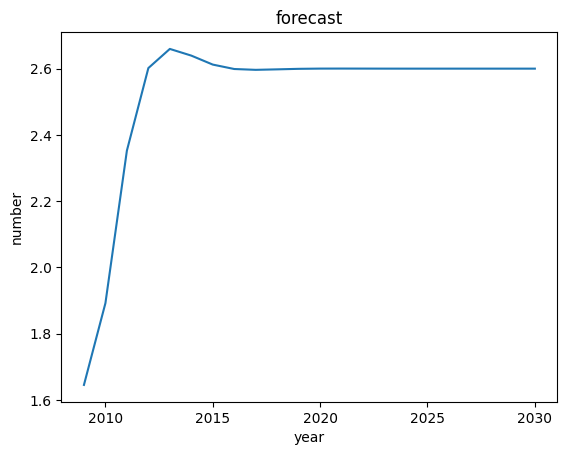

In [94]:
plt.plot(np.arange(2009, 2031), np.array(forecast))
plt.title('forecast')
plt.xlabel('year')
plt.ylabel('number')
plt.show()